<h2 id="part-0-intro-to-adaboost-classifier">Lab: AdaBoost Classifier with OOP</h2>

<p>We have encountered <code>AdaBoost</code> and its gradient
descent variant, <code>GradientBoostingRegressor</code>. The base form of AdaBoost was
introduced in 1995 as an ensemble classifier, <code>AdaBoostClassifier</code>.
Understanding <code>AdaBoostClassifier</code> is regarded as the defacto
introduction to the world of seemingly endless variants of boosting algorithms. To gain a more entrenched understanding of boosting
in general, I would recommend <a href="http://rob.schapire.net/papers/explaining-adaboost.pdf">this</a>.</p>

Adaboost is a very important algorithm so it is necessary to understand it very well. 

We are going to implement the following version of it:
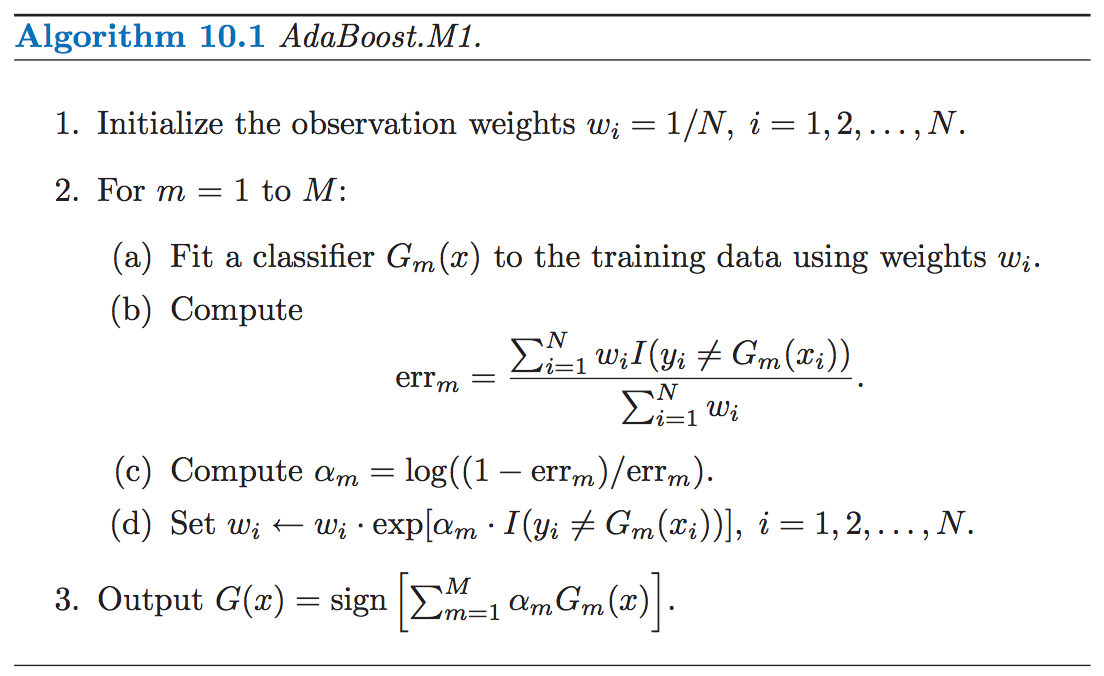



<h2 id="part-1-implementing-the-adaboost-classifier">Part 1: Implementing the AdaBoost Classifier</h2>

<p>Here we will build a simplified version of <code>AdaBoostClassifier</code>. In this case,
our classifier, <code>AdaBoostBinaryClassifier</code>, will only predict binary outcomes.
Remember it is more important to understand the intuition of the algorithm
than get to the end of the exercise.</p>



<p>We&#39;re going to be using a spam dataset from the data folder you downloaded. You can see the feature names <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names" class="external-link" target="_blank">here</a>.</p>

<p>Here&#39;s how you should be able to run your code after you&#39;re finished:</p>

<pre lang="python"><code>
import numpy as np
from sklearn.model_selection import train_test_split
data = np.genfromtxt(&#39;data/spam.csv&#39;, delimiter=&#39;,&#39;)

y = data[:, -1]
x = data[:, 0:-1]

train_x, test_x, train_y, test_y = train_test_split(x, y)

my_ada = AdaBoostBinaryClassifier(n_estimators=50)
my_ada.fit(train_x, train_y)
print (&quot;Accuracy:&quot;, my_ada.score(test_x, test_y))
</code></pre>


### Note: The following questions are to be implemented in the python class below the cells

<ol>
<li><p>Take a look at the <code>__init__</code> method in <code>src/boosting.py</code>. You shouldn&#39;t need to change anything here. Note how we are creating Decision Trees that are just stumps! (max depth is 1).</p></li>
<li><p>Implement the <code>_boost</code> method. This will be doing steps (a)-(d) inside the for loop.</p>

<p>Because we need many copies of the estimator, the first step is to clone it. This code is given for you.</p>

<p>In this function <code>sample_weight</code> refers to the <em>wi</em>&#39;s in the above description of the algorithm.</p>

<p>You will need to do these steps:</p>

<ul>
<li>Fix the Decision Tree using the weights. You can do this like this: <code>estimator.fit(x, y, sample_weight=sample_weight)</code></li>
<li>Calculate the error term (<code>estimator_error</code>)</li>
<li>Calculate the alpha (<code>estimator_weight</code>)</li>
<li>Update the weights (<code>sample_weight</code>)</li>
</ul></li>
<li><p>Implement the <code>fit</code> method. This is steps 1 and 2 from above.</p>

<p>You should have a for loop that calls your <code>_boost</code> method <code>n_estimators</code> times. Make sure to save all the estimators in <code>self.estimators_</code>. You also need to save all the estimator weights in <code>self.estimator_weight_</code>.</p></li>
<li><p>Implement the <code>predict</code> method. This is step 3 from above.</p>

<p>Note that the algorithm considers the predictions to be either -1 or 1. So once you get predictions back from your Decision Trees, change the 0&#39;s to -1&#39;s.</p></li>
<li><p>Implement the <code>score</code> method.</p>

<p>This should call the predict method and then calculate the accuracy.</p></li>
<li><p>Load the file <code>data/spam_data.csv</code> into a dataframe. Use <code>train_test_split</code> to create test and train sets.
Train your implementation of <code>AdaBoostBinaryClassifier</code> on the train set and get the train and test accuracy scores.
Compare your results with sklearn&#39;s <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html" class="external-link" target="_blank">AdaBoostClassifier</a>.
You should get approximately the same accuracy.</p>

</li>
</ol>

<p><br></p>

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone


class AdaBoostBinaryClassifier(object):
    '''
    INPUT:
    - n_estimator (int)
      * The number of estimators to use in boosting
      * Default: 50

    - learning_rate (float)
      * Determines how fast the error would shrink
      * Lower learning rate means more accurate decision boundary,
        but slower to converge
      * Default: 1
    '''

    def __init__(self,
                 n_estimators=50,
                 learning_rate=1):

        self.base_estimator = DecisionTreeClassifier(max_depth=1)
        self.n_estimator = n_estimators
        self.learning_rate = learning_rate

        # Will be filled-in in the fit() step
        self.estimators_ = []
        self.estimator_weight_ = np.zeros(self.n_estimator, dtype=np.float)

    
    def fit(self, x, y):
        '''
        INPUT:
        - x: 2d numpy array, feature matrix
        - y: numpy array, labels

        Build the estimators for the AdaBoost estimator.
        '''

        pass  ### YOUR CODE HERE ###


    def _boost(self, x, y, sample_weight):
        '''
        INPUT:
        - x: 2d numpy array, feature matrix
        - y: numpy array, labels
        - sample_weight: numpy array

        OUTPUT:
        - estimator: DecisionTreeClassifier
        - sample_weight: numpy array (updated weights)
        - estimator_weight: float (weight of estimator)

        Go through one iteration of the AdaBoost algorithm. Build one estimator.
        '''

        estimator = clone(self.base_estimator)

        ### YOUR CODE HERE ###


    def predict(self, x):
        '''
        INPUT:
        - x: 2d numpy array, feature matrix

        OUTPUT:
        - labels: numpy array of predictions (0 or 1)
        '''

        pass  ### YOUR CODE HERE ###


    def score(self, x, y):
        '''
        INPUT:
        - x: 2d numpy array, feature matrix
        - y: numpy array, labels

        OUTPUT:
        - score: float (accuracy score between 0 and 1)
        '''

        pass  ### YOUR CODE HERE ###

In [ ]:
from sklearn.model_selection import train_test_split
data = np.genfromtxt('../data/spam.csv', delimiter=',')

y = data[:, -1]
x = data[:, 0:-1]

train_x, test_x, train_y, test_y = train_test_split(x, y)

my_ada = AdaBoostBinaryClassifier(n_estimators=50)
my_ada.fit(train_x, train_y)
print ("Accuracy:", my_ada.score(test_x, test_y))
# You should get an accuracy of 0.9357080799304952

In [ ]:
my_ada.predict(test_x)